In [1]:
import numpy as np
import matplotlib.pyplot as plt
import helmeos
import pandas as pd

In [2]:
gconst = 6.67430e-8
clight = 2.99792458e10
solar = 1.98847e33
lencgs2code = (clight**2)/(solar*gconst)
masscgs2code = (1.0e0/solar)
rhocgs2code = (masscgs2code/lencgs2code**3)
tcgs2code = (clight**3)/(solar*gconst)
energycgs2code = (1.0E0/clight**2)
me2 = 9.1093837015e-28*masscgs2code
mb2 = 1.66053906660e-24*masscgs2code
ye = 0.5e0
h_bar = (1.054571817e-27)*(lencgs2code**2*masscgs2code/tcgs2code)
amax = (me2**4)/(2.4e1*np.pi**2*h_bar**3)
bmax = (mb2*me2**3)/(3.0e0*np.pi**2*h_bar**3*ye)
def xe(rho):
    return (rho/bmax)**(1.0e0/3.0e0)
def dpdx(x):
    return 8.0e0*x**4/np.sqrt(x**2 + 1.0e0)
def cs(rho):
    return np.sqrt(amax*dpdx(xe(rho))/3.0e0/(rho**2*bmax)**(1.0e0/3.0e0))

In [3]:
atmosphere_rho = 1.6193113417486485E-016
atmosphere_eps =  1.8948692839891130E-005
atmosphere_pres =  1.5764116163599139E-021
atmosphere_abar = 4
atmosphere_zbar = 2
atmosphere_ye = 0.5

In [4]:
eps = np.loadtxt("/home/cnchong/Codes/cumc3d/model/Type_Ia/eps.dat").reshape(800,400)

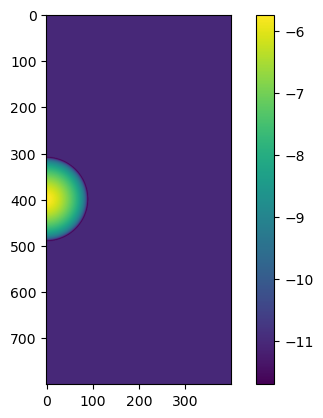

In [7]:
plt.imshow(np.log(eps))
plt.colorbar()

In [4]:
phi = np.loadtxt("/home/cnchong/Codes/cumc3d/model/Type_Ia/BCphi.dat").reshape(150,150)
vol = np.loadtxt("/home/cnchong/Codes/cumc3d/model/Type_Ia/vol.dat").reshape(150,150)
z = np.loadtxt("/home/cnchong/Codes/cumc3d/model/Type_Ia/z.dat")
x = np.loadtxt("/home/cnchong/Codes/cumc3d/model/Type_Ia/x.dat")
y = np.loadtxt("/home/cnchong/Codes/cumc3d/model/Type_Ia/y.dat")
dy = np.loadtxt("/home/cnchong/Codes/cumc3d/model/Type_Ia/dy.dat")

dx2 = np.diff(x**2)
dz = np.diff(z)
dxx2,dzz = np.meshgrid(dx2,dz)

In [5]:
vol_real = dxx2*dzz*np.pi

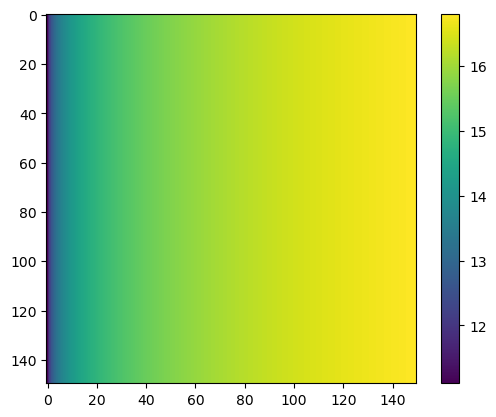

In [13]:
plt.imshow(np.log(vol-vol_real))
plt.colorbar()

In [8]:
dy

array(6.28318531)

In [7]:
np.sum(vol*phi)

11.52132392734574